In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

In [3]:
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,245000.0,2,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295,1220,1740
16609,275000.0,4,2.00,1480,15000,1.0,0,0,4,7,1480,0,1957,0,98055,47.4312,-122.196,1450,8768
16610,270000.0,3,2.00,2330,8000,1.0,0,0,3,7,1390,940,1986,0,98023,47.2958,-122.368,1570,7227
16611,767250.0,4,3.00,2170,2500,2.0,0,0,3,8,1710,460,1997,0,98115,47.6742,-122.303,2170,4080


In [47]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
price            16613 non-null float64
bedrooms         16613 non-null int64
bathrooms        16613 non-null float64
sqft_living      16613 non-null int64
sqft_lot         16613 non-null int64
floors           16613 non-null float64
waterfront       16613 non-null int64
view             16613 non-null int64
condition        16613 non-null int64
grade            16613 non-null int64
sqft_above       16613 non-null int64
sqft_basement    16613 non-null int64
yr_built         16613 non-null int64
yr_renovated     16613 non-null int64
zipcode          16613 non-null int64
lat              16613 non-null float64
long             16613 non-null float64
sqft_living15    16613 non-null int64
sqft_lot15       16613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 2.4 MB


In [6]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
num=house_data.select_dtypes(include=np.number).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
X=house_data.drop('price',axis=1)
y=house_data['price']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [13]:
model=LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
pred=model.predict(X_test)

In [16]:
pred

array([673591.53980627, 400250.29040996, 841840.83202032, ...,
       806931.63942998, 675569.78126201, 694825.84005804])

In [17]:
from sklearn.metrics import accuracy_score

In [21]:
model.coef_

array([-3.74857592e+04,  4.29379554e+04,  1.07141392e+02,  1.48656796e-01,
        2.19886033e+03,  5.40518504e+05,  5.16468847e+04,  2.74998505e+04,
        8.84037219e+04,  7.13105866e+01,  3.58308048e+01, -2.94202599e+03,
        1.72332954e+01, -5.95567756e+02,  5.84024271e+05, -1.81576296e+05,
        4.02272881e+01, -3.45122283e-01])

In [22]:
model.intercept_

13582495.566615297

In [45]:
X_test.shape

(3323, 18)

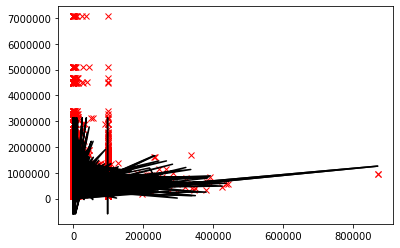

In [57]:
import  matplotlib.pyplot as plt
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, pred, color='black')
plt.show()

In [58]:
from sklearn import metrics



In [63]:
metrics.mean_squared_error(y_test,pred)

45404897537.134346

In [64]:
metrics.mean_absolute_error(y_test,pred)

127356.82239394

In [65]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

213084.2498570327

In [62]:
metrics.r2_score(y_test,pred)

0.6969035645345151

In [49]:
test_new 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4995,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4996,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4997,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [50]:
prediction =model.predict(test_new)

In [51]:
prediction

array([1718097.47902364,  680460.1383599 ,  464304.85295358, ...,
        108963.76308394,  362262.68682119,  111914.17931694])

In [66]:
res = pd.DataFrame(prediction)
res.index = test_new.index
res.columns = ["prediction"]
res.to_csv("prediction.csv")    